In [9]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from BCI_dataset.dataloader import BCIDataset
from matplotlib import pyplot as plt

In [10]:
image_size = 224
data_dir = 'BCI_dataset'

In [11]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((image_size, image_size)),
        transforms.Normalize((0.5,), (0.5,))
    ])

train_dataset = BCIDataset(data_dir=data_dir, type='train', transform=transform)
test_dataset = BCIDataset(data_dir=data_dir, type='test', transform=transform)
    

In [14]:
def show_pil_image(pil_image, title='PIL Image'):
    plt.imshow(pil_image)
    plt.title(title)
    plt.axis('off')
    plt.show()
    return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.43906778..0.43746924].


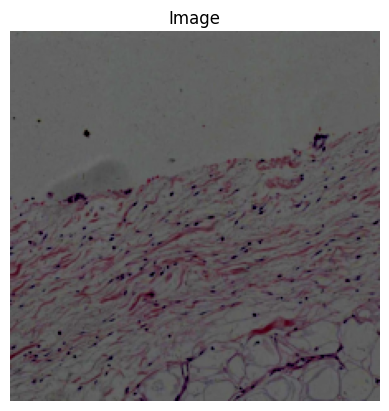

None


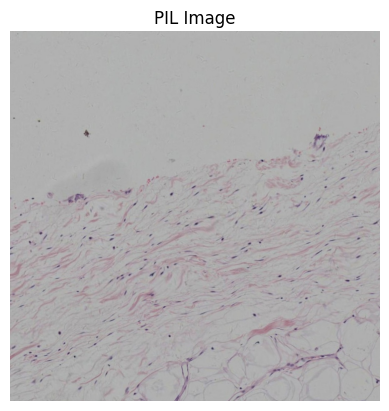

None


In [16]:
from utils import show_image
HE_image, IHC_image, label = train_dataset.__getitem__(0).values()
original_HE_image = train_dataset.HEdata[0]
print(show_image(HE_image))
print(show_pil_image(original_HE_image))